
# Explore the SIR model

  `02-SIR-model-explore.ipynb` 

  Updated: _2024-02-19_

<a href="https://colab.research.google.com/github/MMIV-ML/blob/main/Lab5-Comp-Model/02-SIR-model-explore.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<img src="../../assets/GPT-MedAI.png" width="400"><br>

### Learning objectives

Give a short introduction to the SIR model. Make an illustrative figure of the SIR model. Give an implementation in Python.

<img src="../assets/DALL·E_SIR_model.png"  width=400> <br>

DALL·E 2024-02-19 00.27.07 - Create a detailed illustration of the SIR model in epidemiology, showcasing three groups of people represented by different colors ... 

In [23]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.

try:
    import google.colab
    # If this statement executes without error, you're in a Colab environment.
    is_colab = True
    print("Running in Google Colab.")
    !pip install gdown
except ImportError:
    # An ImportError means you're not in a Colab environment.
    is_colab = False
    print("Not running in Google Colab.")
    # We use a very handy [**pydicom**](https://github.com/pydicom/pydicom) library to load bunch of dicom files.
    try:
        import transformers
        print('transformers package imported succesfully!')
    except ImportError:
        print ('It seems that you have to install the transformers package, and we will pip install it (in this bmed365 environment).\n')
        #!pip install transformers

Not running in Google Colab.
transformers package imported succesfully!


**Check your platform**

In [24]:
import platform

if platform.system() == 'Darwin':
    print(f'OK, you are running on MacOS ({platform.version()})')
if platform.system() == 'Linux':
    print(f'OK, you are running on Linux ({platform.version()})')
if platform.system() == 'Windows':
    print(f'OK, but consider to install WSL for Windows10 since you are running on {platform.system()}')
    print('Check https://docs.microsoft.com/en-us/windows/wsl/install-win10')

OK, you are running on MacOS (Darwin Kernel Version 23.3.0: Wed Dec 20 21:28:58 PST 2023; root:xnu-10002.81.5~7/RELEASE_X86_64)


### Outline

- Introduction to the SIR model
- Implementation in Python
- Explore the model

### Introduction to the SIR model

The SIR model is a simple mathematical model to understand the spread of a disease in a population. It divides the population into three compartments:

- S: The number of susceptible individuals. These are individuals who have not been infected with the disease, and are capable of being infected.
- I: The number of infectious individuals. These are individuals who have been infected with the disease, and are capable of infecting susceptible individuals.
- R: The number of removed individuals. These are individuals who have been infected with the disease and have recovered, and are assumed to have acquired immunity to the disease.

The model is governed by the following system of ordinary differential equations:

$$
\begin{align*}
\frac{dS}{dt} &= -\beta \frac{SI}{N} \\
\frac{dI}{dt} &= \beta \frac{SI}{N} - \gamma I \\
\frac{dR}{dt} &= \gamma I
\end{align*}
$$

where $\beta$ is the transmission rate, $\gamma$ is the recovery rate, and $N$ is the total population.

### Implementation in Python

We will use the `scipy` library to solve the system of ordinary differential equations. We will also use `matplotlib` to visualize the results.

```python
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True) 
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
```

### Explore the model

- What happens if we change the transmission rate $\beta$?
- What happens if we change the recovery rate $\gamma$?
- What happens if we change the initial number of infected individuals $I0$?

### Summary

In this notebook, we have given a short introduction to the SIR model, and provided an implementation in Python. We have also explored the model by changing the parameters and initial conditions.

### References

- https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
- https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology
- https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model



In [25]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

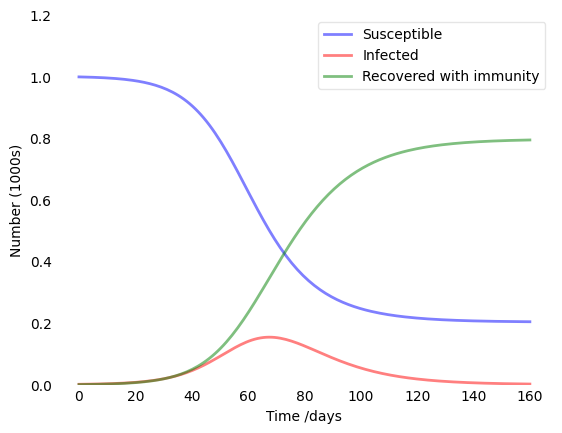

In [26]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True) 
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()